In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
(x_train,y_train),(x_test,y_test )=tf.keras.datasets.cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Training Images: ()'.format(x_train.shape))
print('Testing Images: ()'.format(x_test.shape))

Training Images: ()
Testing Images: ()


In [ ]:
print(x_train[0].shape)
print(x_test[0].shape)

(32, 32, 3)
(32, 32, 3)


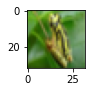

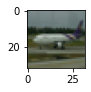

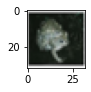

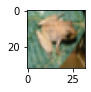

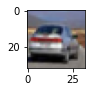

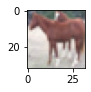

In [ ]:
for i in range(232,238):
  plt.subplot(120+ 1 + i)
  img=x_train[i]
  plt.imshow(img)
  plt.show()

In [ ]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [ ]:
x_train/=255
x_test/=255
n_classes=10

In [ ]:
print("Shape before one hot encoding: ",y_train.shape)
y_train=np_utils.to_categorical(y_train, n_classes)
y_test=np_utils.to_categorical(y_test, n_classes)
print("Shape after one hot encoding: ",y_train.shape)

Shape before one hot encoding:  (50000, 1)
Shape after one hot encoding:  (50000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

In [ ]:
model=Sequential()
model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))


model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
391/391 [==============================] - 497s 1s/step - loss: 1.6198 - accuracy: 0.4043 - val_loss: 1.2254 - val_accuracy: 0.5623
Epoch 2/20
391/391 [==============================] - 498s 1s/step - loss: 1.1725 - accuracy: 0.5847 - val_loss: 0.9514 - val_accuracy: 0.6665
Epoch 3/20
391/391 [==============================] - 495s 1s/step - loss: 0.9805 - accuracy: 0.6550 - val_loss: 0.8774 - val_accuracy: 0.6975
Epoch 4/20
391/391 [==============================] - 494s 1s/step - loss: 0.8771 - accuracy: 0.6925 - val_loss: 0.7780 - val_accuracy: 0.7313
Epoch 5/20
391/391 [==============================] - 492s 1s/step - loss: 0.7979 - accuracy: 0.7208 - val_loss: 0.7521 - val_accuracy: 0.7365
Epoch 6/20
391/391 [==============================] - 499s 1s/step - loss: 0.7303 - accuracy: 0.7442 - val_loss: 0.7260 - val_accuracy: 0.7475
Epoch 7/20
391/391 [==============================] - 489s 1s/step - loss: 0.6775 - accuracy: 0.7627 - val_loss: 0.7076 - val_accuracy: 0.7571

In [ ]:
classes=range(0,10)
names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_labels=dict(zip(classes,names))
batch=x_test[100:109]
labels=np.argmax(y_test[100:109],axis=-1)
prediction=model.predict(batch,verbose=1)

1/1 [==============================] - 0s 160ms/step


In [ ]:
print(prediction)

[[5.20543799e-05 4.02499245e-06 2.71395333e-02 4.62901359e-03
  5.09976864e-01 3.97550277e-02 4.57101909e-04 4.17959303e-01
  1.46735274e-05 1.24097269e-05]
 [1.03162929e-05 2.42473725e-05 3.06576192e-02 1.99949160e-01
  4.09141481e-02 5.46560109e-01 1.73119940e-02 1.64014354e-01
  3.19241197e-04 2.38859706e-04]
 [3.71961846e-07 1.95184330e-05 6.35173731e-03 4.60514389e-02
  2.02956107e-05 9.32838488e-03 9.38073099e-01 1.04427876e-04
  1.59426691e-05 3.47011919e-05]
 [1.42819999e-06 3.28305276e-07 4.07267624e-04 9.40760791e-01
  5.16951568e-02 1.59496744e-03 4.75027459e-03 7.63371994e-04
  1.49870257e-05 1.13300212e-05]
 [1.38328167e-08 9.99896884e-01 2.32046179e-15 1.14505874e-15
  9.78728269e-19 1.78520955e-16 2.30253777e-13 2.34157944e-16
  2.24310472e-08 1.03125916e-04]
 [1.32083045e-07 9.99726474e-01 1.01708867e-11 1.19164054e-10
  8.03047746e-14 7.98112271e-11 3.06742354e-10 3.73193609e-13
  2.65034672e-04 8.38302822e-06]
 [1.13329604e-01 7.05638085e-04 6.43814951e-02 6.36457980e

In [ ]:
for image in prediction:
  print(np.sum(image))

1.0000001
1.0
0.9999999
0.9999999
1.0
1.0
1.0
0.99999994
1.0


In [ ]:
class_result=np.argmax(prediction,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


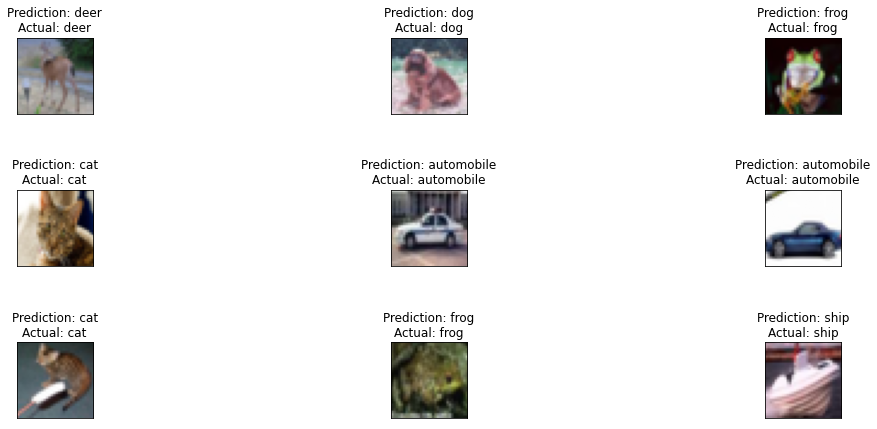

In [ ]:
fig,axs=plt.subplots(3,3,figsize=(19,7))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()
for i,img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i]==key:
      title='Prediction: {}\nActual: {}'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
  axs[i].imshow(img)
plt.show()  

